In [ ]:
#Add median filter for noise remove
#then add  watershed model and gray level threshold 
#Canny edge detection method



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import scipy.ndimage as ndimage
from skimage import measure, morphology, segmentation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

img = cv2.imread('test/tb1.png',0)

In [ ]:
scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized,'gray')


In [ ]:
median = cv2.medianBlur(resized,5)
plt.imshow(median,'gray')


In [ ]:
##watershed algorithm


In [ ]:
#img = cv2.imread('coins.png')
#gray = cv2.cvtColor(median,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(median,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh,'gray')

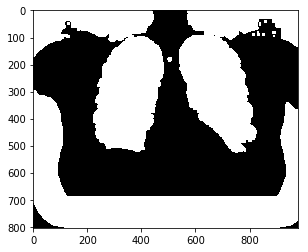

In [134]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=2)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
#plt.imshow(sure_fg,'gray')

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown,'gray')

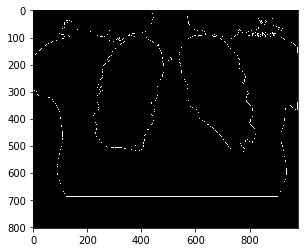

In [135]:
edges = cv2.Canny(thresh,100,200)

plt.imshow(edges,'gray')

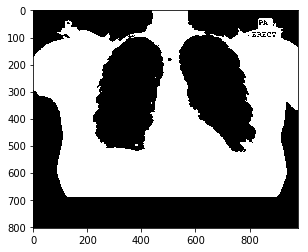

In [136]:
ne  = cv2.subtract(255, thresh) 
plt.imshow(ne,'gray')

In [137]:
###############################################################################################